In [160]:
import itertools
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
%matplotlib inline

Import Data

In [161]:
df = pd.read_csv('file/Dataset Pencemaran Udara SPKU Feb 2021.csv')
df = df.dropna()

df = df[['pm10','pm25','so2','co','o3','no2','categori']]
df

,pm10,pm25,so2,co,o3,no2,categori
0,59,79,21,26,15,31,SEDANG
1,30,46,21,14,16,24,BAIK
2,23,33,19,11,14,19,BAIK
3,36,53,23,14,12,24,SEDANG
4,29,36,20,14,12,21,BAIK
...,...,...,...,...,...,...,...
135,24,40,28,4,11,7,BAIK
136,28,52,31,7,13,23,SEDANG
137,24,49,21,7,22,18,BAIK
138,39,64,27,10,25,24,SEDANG


Data Cleaning

In [162]:
index = ['pm10','pm25','so2','co','o3','no2']
df_clean = df
for data in index:
  df_clean = df_clean[df_clean[data].str.isnumeric()]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      128 non-null    object
 1   pm25      128 non-null    object
 2   so2       128 non-null    object
 3   co        128 non-null    object
 4   o3        128 non-null    object
 5   no2       128 non-null    object
 6   categori  128 non-null    object
dtypes: object(7)
memory usage: 8.0+ KB


In [163]:

df_clean['categori'].replace(df_clean['categori'].unique(), [1,2,0], inplace=True)
df_clean = df_clean[['pm10','pm25','so2','co','o3','no2','categori']].astype(int)
df_clean['categori'].replace(df_clean['categori'].unique(), ['sedang', 'baik', 'buruk'], inplace=True)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      128 non-null    int32 
 1   pm25      128 non-null    int32 
 2   so2       128 non-null    int32 
 3   co        128 non-null    int32 
 4   o3        128 non-null    int32 
 5   no2       128 non-null    int32 
 6   categori  128 non-null    object
dtypes: int32(6), object(1)
memory usage: 5.0+ KB


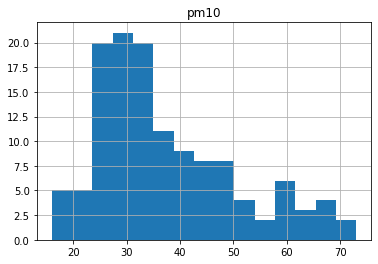

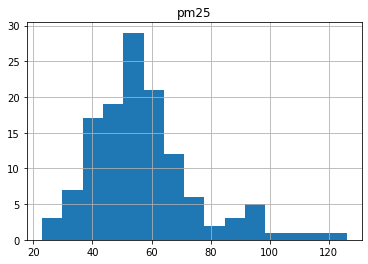

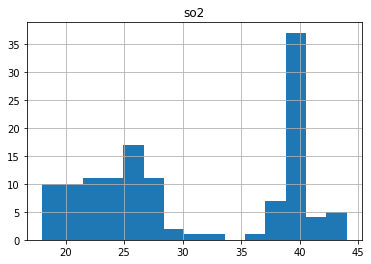

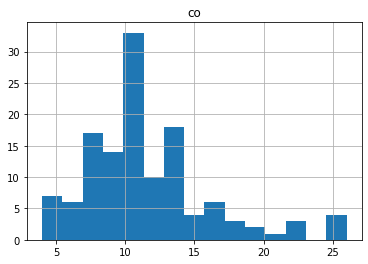

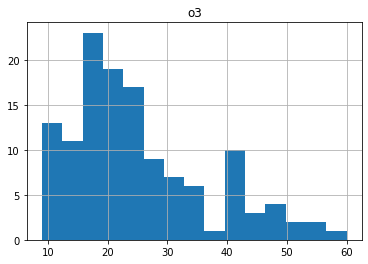

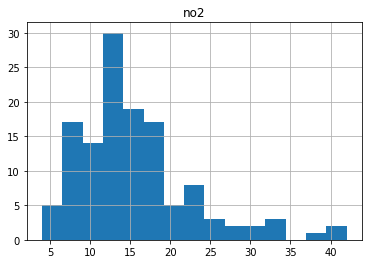

In [164]:
index = ['pm10','pm25','so2','co','o3','no2']
for index in index:
  df_clean.hist(column=index, bins=15)

In [165]:
df_clean.columns

Index(['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'categori'], dtype='object')

In [166]:
x = df_clean[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].values
x[:5]

array([[59, 79, 21, 26, 15, 31],
       [30, 46, 21, 14, 16, 24],
       [23, 33, 19, 11, 14, 19],
       [36, 53, 23, 14, 12, 24],
       [29, 36, 20, 14, 12, 21]])

In [167]:
y = df_clean['categori'].values
y[:5]

array(['sedang', 'baik', 'baik', 'sedang', 'baik'], dtype=object)

Preprocessing

In [168]:
x =preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 1.67163037,  1.19565755, -1.13819441,  3.17928956, -0.88916436,
         2.16882861],
       [-0.56605154, -0.63289332, -1.13819441,  0.55663179, -0.80168316,
         1.18588959],
       [-1.10618165, -1.35323154, -1.37702865, -0.09903265, -0.97664556,
         0.4837903 ],
       [-0.10308287, -0.24501889, -0.89936017,  0.55663179, -1.15160795,
         1.18588959],
       [-0.64321298, -1.18699964, -1.25761153,  0.55663179, -1.15160795,
         0.76463002]])

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)


print('train set', x_train.shape, y_train.shape)
print('train set', x_test.shape, y_test.shape)

train set (102, 6) (102,)
train set (26, 6) (26,)


In [170]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knn = KNC(n_neighbors=4).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [171]:
yhat = knn.predict(x_test)
yhat[0:10]

array(['baik', 'baik', 'baik', 'sedang', 'baik', 'sedang', 'baik', 'baik',
       'sedang', 'sedang'], dtype=object)

Tes akurasi

In [172]:
from sklearn import metrics
print("Train Accuracy : ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test Accuracy : ", metrics.accuracy_score(y_test, knn.predict(x_test)))

Train Accuracy :  0.9215686274509803
Test Accuracy :  0.9230769230769231


In [173]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
confussionMx = [];

for n in range(1, Ks):
  neighbor = KNC(n_neighbors = n).fit(x_train,y_train)
  yhat = neighbor.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76923077, 0.92307692, 0.73076923, 0.92307692, 0.80769231,
       0.80769231, 0.73076923, 0.80769231, 0.76923077, 0.84615385])

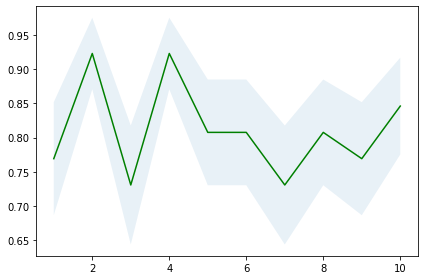

In [174]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc, mean_acc+1*std_acc, alpha =  0.10)
plt.tight_layout()
plt.show()